**Objective**: Build an XGBoost model for predicting heart disease and experiment with hyperparameter tuning to improve its performance.

Dataset: [Heart Disease UCI](https://archive.ics.uci.edu/dataset/45/heart+disease)

# Task 1: Data Loading and Exploration
1. Load the Heart Disease UCI dataset.
2. Explore the dataset to understand its structure and features.
3. Split the data into training and testing sets.

In [2]:
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
heart_data = pd.read_csv(url, names=column_names, na_values='?')
print(heart_data.shape)
train,test=train_test_split(heart_data,test_size=0.3,random_state=7532)
XLabel,yLabel=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],['target']
X_train,y_train,X_test,y_test= train[XLabel],train[yLabel],test[XLabel],test[yLabel]
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(303, 14)
(212, 13) (91, 13) (212, 1) (91, 1)


# Task 2: Data Preprocessing
1. Handle missing values if any.
2. Encode categorical variables using appropriate methods.
3. Standardize or normalize numerical features if necessary.

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

heart_data.isnull().sum()
numerical_features = heart_data.select_dtypes(include=['float64']).columns
categorical_features=['sex','cp','fbs','restecg','exang','slope','ca','thal']
numerical_features = [item for item in numerical_features if item not in categorical_features]



In [4]:
#preprocessing
preprocessor= ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_features),
        ('cat',OneHotEncoder(sparse_output=False),categorical_features)
    ]
)

preprocessor.set_output(transform='pandas')
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)


# Task 3: Initial XGBoost Model
1. Build an initial XGBoost model using default hyperparameters.
2. Train the model on the training set and evaluate its performance on the testing set.
3. Note down the accuracy and any other relevant metrics.

In [5]:

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#define the classifier
xgb = XGBClassifier(random_state=56)

xgb.fit(X_train_prep, y_train)
xgb_predictions = xgb.predict(X_test_prep)


# Accuracy of the model
xgb_acc = accuracy_score(y_test, xgb_predictions)
print(f'Accuracy: {xgb_acc}')


Accuracy: 0.5494505494505495


# Task 4: Hyperparameter Tuning
1. Experiment with hyperparameter tuning to improve model performance.
2. Adjust hyperparameters such as learning_rate, n_estimators, max_depth, etc.
3. Use techniques like cross-validation to find optimal hyperparameters.
4. Train and evaluate the model with the tuned hyperparameters.

In [6]:
from sklearn.model_selection import GridSearchCV

param = {
      'n_estimators': np.arange(1,20,1),
      'max_depth': np.arange(1,5,1),
      'gamma': np.arange(2,6,1),
      'booster': ['dart']
}
# Create GridSearchCV object
grid_search = GridSearchCV(xgb, param, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_prep, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

y_top_pred = best_rf_model.predict(X_test_prep)

#Accuracy of the best model
top_acc = accuracy_score(y_test, y_top_pred)
print("Top Accuracy value:", top_acc)
print("Top Hyperparameters:",grid_search.best_params_)

Top Accuracy value: 0.6153846153846154
Top Hyperparameters: {'booster': 'dart', 'gamma': 3, 'max_depth': 1, 'n_estimators': 7}


# Task 5: Feature Importance
1. Explore feature importance using the **feature_importances_** attribute of the trained XGBoost model.
2. Identify the most important features for heart disease prediction.

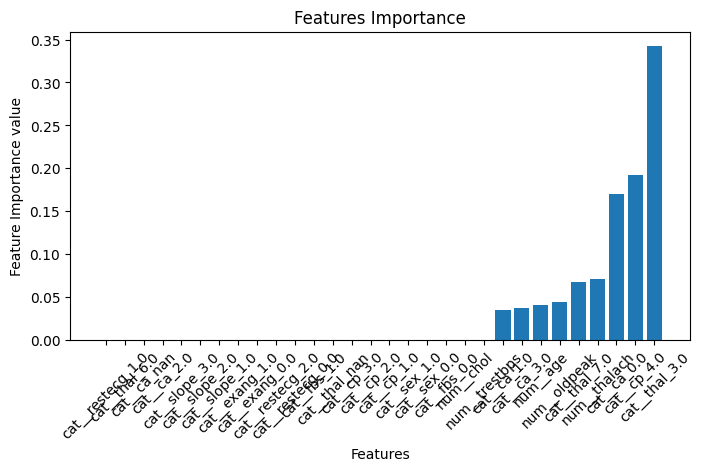

In [7]:
import matplotlib.pyplot as plt

# feature importances
features_val = best_rf_model.feature_importances_

#dataframe with features and their corresponding importance
features_plt = pd.DataFrame({"Features": X_test_prep.columns,
                              "Feature Importance value": features_val})
#sorting values
features_plt = features_plt.sort_values(by='Feature Importance value')

#create the plot
plt.figure(figsize=(8, 4))
plt.bar(features_plt['Features'], features_plt['Feature Importance value'])
plt.xlabel('Features')
plt.ylabel('Feature Importance value')
plt.title('Features Importance')
plt.xticks(rotation=45)
plt.show()


# Task 6: Model Evaluation
1. Compare the performance metrics of the initial model and the tuned model.
2. Visualize the improvement achieved in a clear and concise manner.
3. Discuss the impact of hyperparameter tuning and feature importance on model performance.

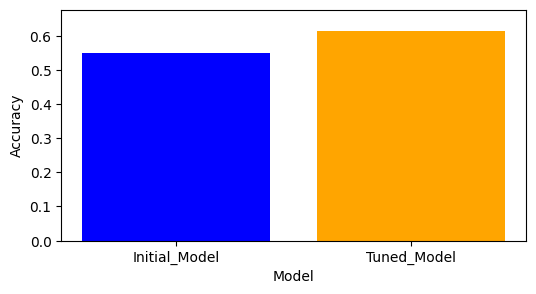

Accuracy's increase of the tuned model: 0.06593406593406592


In [8]:
import matplotlib.pyplot as plt

acc_diff=top_acc-xgb_acc
plt.figure(figsize=(6,3))
plt.bar(['Initial_Model','Tuned_Model'], [xgb_acc, top_acc], color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,top_acc*1.10)
plt.show()
print(f'Accuracy\'s increase of the tuned model:',acc_diff)

The choice of hyperparameters can have a substantial impact on the model's ability to learn and generalize from the data. Proper hyperparameter tuning can improve model accuracy, convergence speed, robustness and helps the model to avoid over/underfitting. In this case, the tuning of hyperparameters brought an accuracy'increase of the 0.065

Feature importance refers to the impact of different input features on the model's predictions, helps identify which features contribute the most to the model's decision-making process. Identifying and focusing on the most relevant features can enhance model performance and reduce the risk of noise from irrelevant features.